In [3]:
!pip install git+https://github.com/huseinzol05/malaya.git

  Cloning https://github.com/huseinzol05/malaya.git to /tmp/pip-req-build-w768n2go
  Running command git clone --filter=blob:none --quiet https://github.com/huseinzol05/malaya.git /tmp/pip-req-build-w768n2go
  Resolved https://github.com/huseinzol05/malaya.git to commit 06a92a8e608bf136e8dbe93469e32d4cf9b8d53f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.8/293.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for malaya: filename=malaya-5.0.1-py3-none-any.whl size=3158970 sha256=8f088f83ab85ec7f233fc95f1ef89452f63ac9d90ea0c6fec4d81ce1a8b7a9b3
  Stored in directory: /tmp/pip-ephem-wheel-cache-xgvf8vm_/wheels/4e/c8/35/d409e0b8923d5885bf5f75d7a94d535302ed67932ed5

In [4]:
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import malaya
import seaborn as sns

In [5]:
df = pd.read_csv("/kaggle/input/suicide-watch/Suicide_Detection.csv", nrows=20000)

In [6]:
df.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [7]:
# Drop "Unnamed: 0" columns
df = df.drop(["Unnamed: 0"], axis = 1)
# Filter out texts that more than 128 words
df = df[df['text'].apply(lambda x: len(x.split()) <= 128)]
# Relabel the name of classes to number form
category_mapping = {'non-suicide': '0', 'suicide': '1'} # Define the mapping
df['class'] = df['class'].map(category_mapping) # Map to the mapping to relabel

In [8]:
df.head()

,text,class
1,Am I weird I don't get affected by compliments...,0
2,Finally 2020 is almost over... So I can never ...,0
3,i need helpjust help me im crying so hard,1
7,It ends tonight.I can’t do it anymore. \nI quit.,1
10,I took the rest of my sleeping pills and my pa...,1


In [9]:
# Reset the index of filtered df 
df.reset_index(drop = True, inplace = True)
df.head()

,text,class
0,Am I weird I don't get affected by compliments...,0
1,Finally 2020 is almost over... So I can never ...,0
2,i need helpjust help me im crying so hard,1
3,It ends tonight.I can’t do it anymore. \nI quit.,1
4,I took the rest of my sleeping pills and my pa...,1


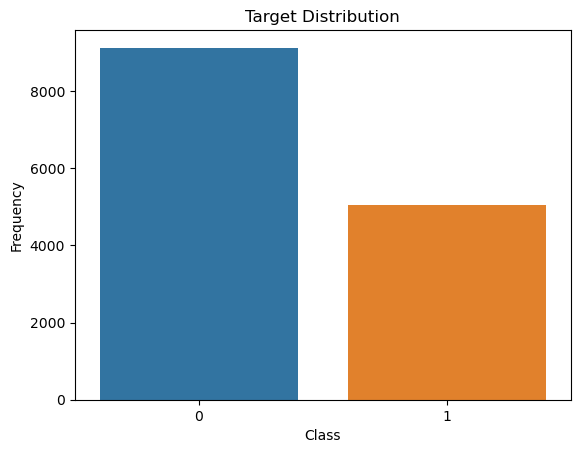

In [10]:
# Plotting the histogram
sns.countplot(data=df, x='class')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Target Distribution')

# Display the plot
plt.show()

In [11]:
df['class'].value_counts()

0    9127
1    5036
Name: class, dtype: int64

In [12]:
transformer = malaya.translation.en_ms.transformer()

In [ ]:
subset1 = df.iloc[:3000].copy()

In [ ]:
subset1['translated_text'] = subset1['text'].apply(lambda x: transformer.greedy_decoder([x]))

In [19]:
subset1.to_csv("subset1.csv")

In [20]:
subset2 = df.iloc[3000:6000].copy()

In [21]:
subset2['translated_text'] = subset2['text'].apply(lambda x: transformer.greedy_decoder([x]))

In [22]:
subset2.to_csv("subset2.csv")

In [13]:
subset3 = df.iloc[6000:9000].copy()

In [14]:
subset3['translated_text'] = subset3['text'].apply(lambda x: transformer.greedy_decoder([x]))

In [15]:
subset3.to_csv("subset3.csv")

In [16]:
subset4 = df.iloc[9000:12000].copy()

In [17]:
subset4['translated_text'] = subset4['text'].apply(lambda x: transformer.greedy_decoder([x]))

In [18]:
subset4.to_csv("subset4.csv")

In [13]:
subset5 = df.iloc[12000:].copy()

In [14]:
subset5['translated_text'] = subset5['text'].apply(lambda x: transformer.greedy_decoder([x]))

In [15]:
subset5.to_csv("subset5.csv")

In [23]:
subset1 = pd.read_csv("/kaggle/working/subset1.csv")
subset2 = pd.read_csv("/kaggle/working/subset2.csv")
subset3 = pd.read_csv("/kaggle/working/subset3.csv")
subset4 = pd.read_csv("/kaggle/working/subset4.csv")
subset5 = pd.read_csv("/kaggle/working/subset5.csv")

In [24]:
concatenated_df = pd.concat([subset1, subset2, subset3, subset4, subset5], axis=0)

In [25]:
concatenated_df.head()

,Unnamed: 0,text,class,translated_text
0,0,Am I weird I don't get affected by compliments...,0,['Adakah saya pelik saya tidak terpengaruh den...
1,1,Finally 2020 is almost over... So I can never ...,0,"['Akhirnya 2020 hampir berakhir ... Oleh itu, ..."
2,2,i need helpjust help me im crying so hard,1,['Saya memerlukan pertolongan untuk menolong s...
3,3,It ends tonight.I can’t do it anymore. \nI quit.,1,['Ia berakhir malam ini. Saya tidak dapat mela...
4,4,I took the rest of my sleeping pills and my pa...,1,['Saya mengambil sisa pil tidur saya dan ubat ...


In [26]:
concatenated_df.drop(["Unnamed: 0"], axis = 1)

,text,class,translated_text
0,Am I weird I don't get affected by compliments...,0,['Adakah saya pelik saya tidak terpengaruh den...
1,Finally 2020 is almost over... So I can never ...,0,"['Akhirnya 2020 hampir berakhir ... Oleh itu, ..."
2,i need helpjust help me im crying so hard,1,['Saya memerlukan pertolongan untuk menolong s...
3,It ends tonight.I can’t do it anymore. \nI quit.,1,['Ia berakhir malam ini. Saya tidak dapat mela...
4,I took the rest of my sleeping pills and my pa...,1,['Saya mengambil sisa pil tidur saya dan ubat ...
...,...,...,...
2158,I AM NO LONGER HOLLY NOR JOLLY😭🔫,0,['SAYA TIADA LONGER HOLLY NOR JOLLY']
2159,Future druggie?Why do i see the only reason to...,1,['Penggalian masa depan? Mengapa saya melihat ...
2160,I just tried to kill myself. Help.I just tried...,1,['Saya baru sahaja cuba membunuh diri. Tolong....
2161,Someone downvoted my post about me being a pie...,1,['Seseorang menolak jawatan saya mengenai saya...


In [27]:
concatenated_df['translated_text'] = concatenated_df['translated_text'].apply(lambda x: x.strip("[]'"))

In [28]:
concatenated_df.to_csv("depressed_suicide.csv")